# <u>Predicting Employee Turnover using Machine Learning<u>

Employee Turnover Rate is the measurement of the number of employees who leave an organization during a specified time period, typically one year.

<i>Note: It's also applicable to sub departments in an organization.<i>

<b>This is a Binary Classification problem. We have to predict if employee is likely to stay or leave

### <u>Exploratory Data Analysis (EDA)<u>

In [1]:
#Using pandas library for data manipulation and data analysis
import pandas as pd

In [2]:
#Importing the dataset and storing in dataframe 'hr'
hr = pd.read_csv("ETP.csv")

In [3]:
#Verifying the import is successful and examining the first 10 values for all features
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
#Gauging the number of rows in the dataset
hr.tail(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14989,0.43,0.57,2,159,3,1,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,0.09,0.81,6,257,4,0,1,0,support,low
14992,0.40,0.48,2,155,3,0,1,0,support,low
14993,0.76,0.83,6,293,6,0,1,0,support,low
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
# Printing all the feature names
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
#Re-naming column 'sales' to 'department' for easy understanding and analysis
hr=hr.rename(columns = {'sales':'department'})

In [7]:
#Checking the number of rows and columns(m*n)
hr.shape

(14999, 10)

In [8]:
#25%, 75%, count, mean, standard deviation etc are displayed
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
#Data Type, missing values, number of rows of each feature etc is displayed
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


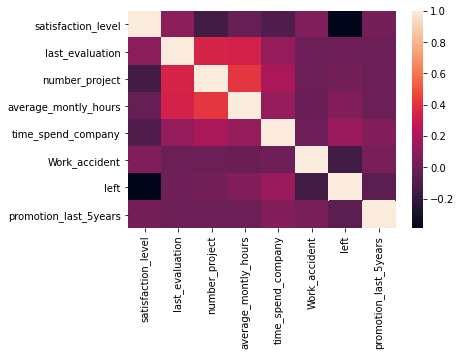

In [10]:
#Correlation Matrix
import seaborn as sns
corr = hr.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

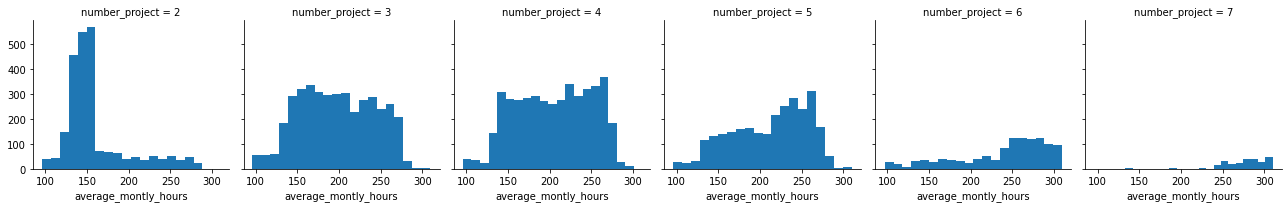

In [11]:
import matplotlib.pyplot as plt
number_project = sns.FacetGrid(hr, col='number_project')
number_project.map(plt.hist, 'average_montly_hours', bins=20)

In [12]:
#Checking for null values, Dataset is balanced
hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

### <u> Feature Engineering<u>

In [13]:
import numpy as np

In [14]:
#Salary and Department is categorical, checking the unique values
hr.describe(include=['O'])

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [15]:
#To make analysis easier we replace rows which have 'support' and 'IT' as 'Technical'
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

In [16]:
#Verifying replacement of 'Technical' is successful
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

In [17]:
#Salary is a categorical data(ordinal) so we will assign equivalent numbers representing order to it
hr.salary = pd.Categorical(hr.salary,['low','medium','high'],ordered=True)
hr.salary=hr.salary.cat.codes

In [18]:
#0->low
#1->medium
#2-high
hr.salary.unique()

array([0, 1, 2], dtype=int8)

In [19]:
#Department is categorical(nominal) so we use in-built get_dummies() function. We use get_dummies
#because one department is not better than the other
hr['department'] = hr['department'].map( {'sales':9 , 
                                          'accounting':8 , 
                                          'hr':7, 
                                          'technical':6, 
                                          'support':5,  
                                          'management':4, 
                                          'IT':3,  
                                          'product_mng':2,  
                                          'marketing':1,  
                                          'RandD':0} ).astype(float)

In [20]:
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,9.0,0
1,0.80,0.86,5,262,6,0,1,0,9.0,1
2,0.11,0.88,7,272,4,0,1,0,9.0,1
3,0.72,0.87,5,223,5,0,1,0,9.0,0
4,0.37,0.52,2,159,3,0,1,0,9.0,0
5,0.41,0.50,2,153,3,0,1,0,9.0,0
6,0.10,0.77,6,247,4,0,1,0,9.0,0
7,0.92,0.85,5,259,5,0,1,0,9.0,0
8,0.89,1.00,5,224,5,0,1,0,9.0,0
9,0.42,0.53,2,142,3,0,1,0,9.0,0


In [21]:
#Moving 'left' to the last position
hr1 = hr.pop('left')  
hr['left']=hr1 

In [22]:
#Creating Predictors and Target
X = hr.iloc[:,0:9]
y = hr.iloc[:,-1]

In [23]:
#Displaying predictors or independent features
X.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,9.0,0
1,0.80,0.86,5,262,6,0,0,9.0,1
2,0.11,0.88,7,272,4,0,0,9.0,1
3,0.72,0.87,5,223,5,0,0,9.0,0
4,0.37,0.52,2,159,3,0,0,9.0,0
5,0.41,0.50,2,153,3,0,0,9.0,0
6,0.10,0.77,6,247,4,0,0,9.0,0
7,0.92,0.85,5,259,5,0,0,9.0,0
8,0.89,1.00,5,224,5,0,0,9.0,0
9,0.42,0.53,2,142,3,0,0,9.0,0


In [24]:
#Displaying Target or Output to predict or dependent feature
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: left, dtype: int64

### <u>Feature Selection<u>

In [25]:
#'average_montly_hours' does not contribute significantly. So let's drop it
hr.drop(columns='average_montly_hours')
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,9.0,0,1
1,0.80,0.86,5,262,6,0,0,9.0,1,1
2,0.11,0.88,7,272,4,0,0,9.0,1,1
3,0.72,0.87,5,223,5,0,0,9.0,0,1
4,0.37,0.52,2,159,3,0,0,9.0,0,1
5,0.41,0.50,2,153,3,0,0,9.0,0,1
6,0.10,0.77,6,247,4,0,0,9.0,0,1
7,0.92,0.85,5,259,5,0,0,9.0,0,1
8,0.89,1.00,5,224,5,0,0,9.0,0,1
9,0.42,0.53,2,142,3,0,0,9.0,0,1


# <u>Modelling<u>

<b>1. Logistic Regression<b>

In [26]:
#Using this class to make my print statement look bold
class color:
    BOLD = '\033[1m'

In [27]:
#Splitting into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

accuracies = {}

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

accuracy = accuracy_score(y_test, pipe.predict(X_test))
accuracy_rounded = round(accuracy*100,2)

accuracies['Logistic Regression'] = accuracy_rounded

print(color.BOLD + "Accuracy of Logistic regression is ", accuracy_rounded,'%')

Accuracy of Logistic regression is  78.88 %


<b>2. Random Forest <b>

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

accuracy = accuracy_score(y_test, classifier.predict(X_test))
accuracy_rounded = round(accuracy*100,2)

accuracies['Random Forest'] = accuracy_rounded

print(color.BOLD + "Accuracy of Random Forest is ", accuracy_rounded,'%')

Accuracy of Random Forest is  98.76 %


<b>3. Support Vector Machines(SVC)<b>

In [30]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, y_train)

accuracy = accuracy_score(y_test, svc.predict(X_test))
accuracy_rounded = round(accuracy*100,2)

accuracies['SVM'] = accuracy_rounded

print(color.BOLD + "Accuracy of Support Vector Machines(SVC) is ", accuracy_rounded,'%')

Accuracy of Support Vector Machines(SVC) is  78.69 %


<b>4. K-nearest neighbors<b>

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

accuracy = accuracy_score(y_test, knn.predict(X_test))
accuracy_rounded = round(accuracy*100,2)

accuracies['K-nearest neigbors'] = accuracy_rounded

print(color.BOLD + "Accuracy of K-nearest neigbors is ", accuracy_rounded,'%')

Accuracy of K-nearest neigbors is  93.26 %


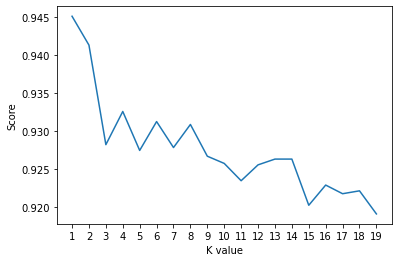

In [32]:
#to find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

<b> 5. Decision Tree<u>

In [33]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

accuracy = accuracy_score(y_test, decision_tree.predict(X_test))
accuracy_rounded = round(accuracy*100,2)

accuracies['Decision Tree'] = accuracy_rounded

print(color.BOLD + "Accuracy of Decision Tree is ", accuracy_rounded,'%')

Accuracy of Decision Tree is  97.52 %


<u><b>Therefore, Random Forest has highest accuracy = 98.7%<b><u>

## <u>Model Validation<u>

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4010
           1       0.99      0.95      0.97      1240

    accuracy                           0.99      5250
   macro avg       0.99      0.98      0.98      5250
weighted avg       0.99      0.99      0.99      5250



### Comparing Models

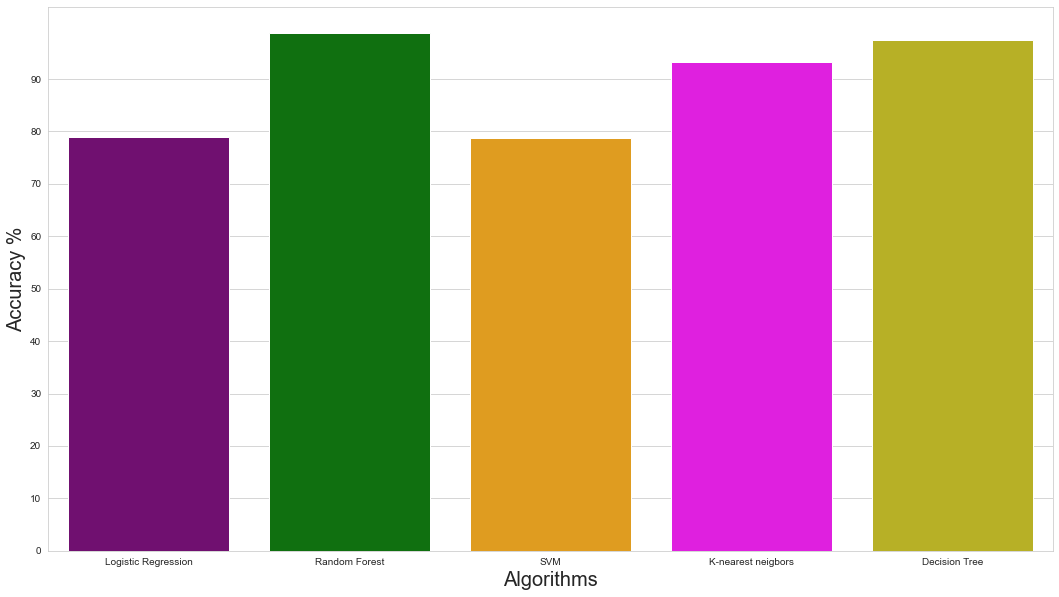

In [35]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(18,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %",fontsize=20)
plt.xlabel("Algorithms",fontsize=20)
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()